In [2]:
from scipy.stats import pearsonr
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
world_data = pd.read_csv('../data/processed/final-assignment-gapminder.csv')

## Group 1 - Factors contributing to Maternal Death Risk 

In [5]:
matvgov = world_data.dropna(subset=['maternal_death_risk'], how='any')
matvgov = matvgov.dropna(how='any')

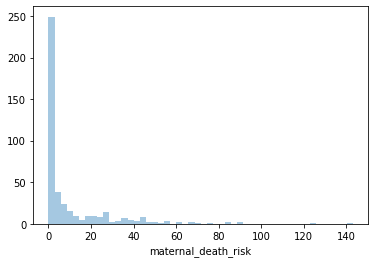

In [6]:
sns.distplot(matvgov.maternal_death_risk, kde=False)

In [8]:
matvgov.year.unique()

array([2005, 2008, 2010])

In [9]:
matvgov.columns

Index(['country', 'year', 'population', 'region', 'sub_region', 'income_group',
       'life_expectancy', 'income', 'children_per_woman', 'child_mortality',
       'pop_density', 'co2_per_capita', 'years_in_school_men',
       'years_in_school_women', 'sugar_intake_daily',
       'gov_health_spending_ratio', 'maternal_death_risk', 'cellphones_per100',
       'gov_health_spending'],
      dtype='object')

In [7]:
matvgov_2010 = matvgov[matvgov.year==2010]

In [8]:
features = matvgov.iloc[:, 6:]
features = features.drop('maternal_death_risk', axis=1)

In [9]:

# Scale the features and set the values to a new variable
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)

In [10]:
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_


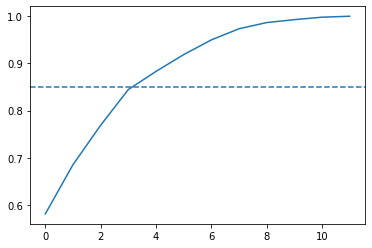

In [11]:
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')

# choose the n_components where about 90% of our variance can be explained
n_components = 5

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=10)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

In [17]:
cum_exp_variance[4]

0.8831316599253655

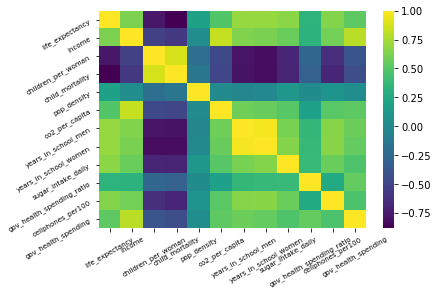

In [18]:
s=sns.heatmap(features.corr(),cmap='viridis') 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
plt.show()

In [212]:
pca.components_.shape

(5, 12)

/home/lina/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


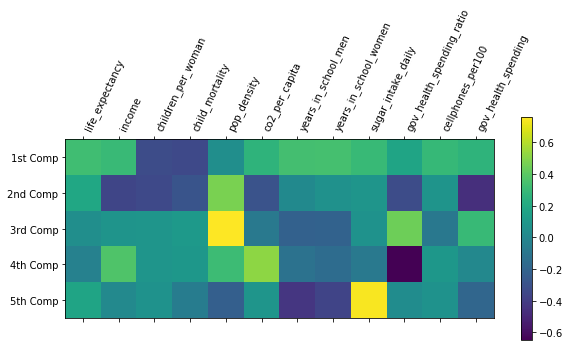

In [213]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp', '4th Comp', '5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(features.columns)),features.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [12]:
from scipy.stats import f_oneway

In [13]:
matvgov.income_group.unique()

array(['Low', 'Upper middle', 'Lower middle', 'High'], dtype=object)

In [14]:
results = f_oneway(matvgov[matvgov.income_group == 'Low']['maternal_death_risk'],
         matvgov[matvgov.income_group == 'Lower middle']['maternal_death_risk'],
         matvgov[matvgov.income_group == 'Upper middle']['maternal_death_risk'],
         matvgov[matvgov.income_group == 'High']['maternal_death_risk']
        )

In [15]:
results

F_onewayResult(statistic=155.87595992993658, pvalue=2.8306680258195237e-68)

In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [17]:
mc = MultiComparison(matvgov['maternal_death_risk'], matvgov['income_group'])

In [18]:
mc_results = mc.tukeyhsd()
print(mc_results)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1       group2    meandiff p-adj   lower    upper   reject
------------------------------------------------------------------
        High          Low  38.2499  0.001  33.3798    43.12   True
        High Lower middle  12.9659  0.001   8.6976  17.2342   True
        High Upper middle   2.4367 0.4167  -1.6481   6.5214  False
         Low Lower middle  -25.284  0.001 -30.4102 -20.1578   True
         Low Upper middle -35.8132  0.001 -40.7877 -30.8388   True
Lower middle Upper middle -10.5292  0.001 -14.9161  -6.1423   True
------------------------------------------------------------------


In [19]:
import statsmodels.formula.api as smf

In [20]:
results = smf.ols('maternal_death_risk ~ C(income_group)', data=matvgov).fit()

In [21]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     maternal_death_risk   R-squared:                       0.522
Model:                             OLS   Adj. R-squared:                  0.519
Method:                  Least Squares   F-statistic:                     155.9
Date:                 Sat, 07 Mar 2020   Prob (F-statistic):           2.83e-68
Time:                         15:14:12   Log-Likelihood:                -1710.4
No. Observations:                  432   AIC:                             3429.
Df Residuals:                      428   BIC:                             3445.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.3202      1.085      0.295      0.768      -1.812       2.453
C(income_group)[T.Low]             38.2499      1.888     20.257      0.000      34.539      41.961
C(income_group)[T.Lower middle]    12.9659      1.655      7.835      0.000       9.713      16.219
C(income_group)[T.Upper middle]     2.4367      1.584      1.539      0.125      -0.676       5.550
==============================================================================
Omnibus:                      317.990   Durbin-Watson:                   1.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6888.657
Skew:                           2.882   Prob(JB):                         0.00
Kurtosis:                      21.694   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
# maternal death risk
pearsonr(matvgov.maternal_death_risk, matvgov.children_per_woman)
# maternal death risk 2010
pearsonr(matvgov_2010.maternal_death_risk, matvgov_2010.children_per_woman)

(0.8651253024475126, 8.171575413953615e-50)

In [148]:
# maternal death risk
pearsonr(matvgov.maternal_death_risk, matvgov.life_expectancy)

(-0.6663611522610632, 2.9258322893548955e-61)

In [143]:
pearsonr(matvgov.maternal_death_risk, matvgov.child_mortality)

(0.8271911699165945, 1.7733808030038588e-118)

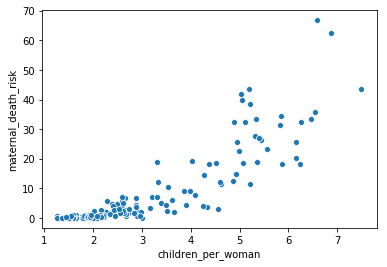

In [161]:
sns.scatterplot("children_per_woman", "maternal_death_risk", data=matvgov_2010)

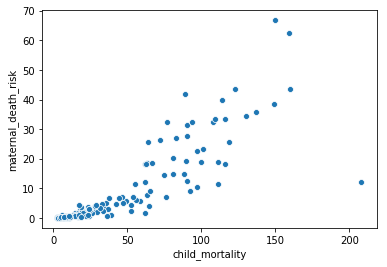

In [162]:
sns.scatterplot("child_mortality", "maternal_death_risk", data=matvgov_2010)

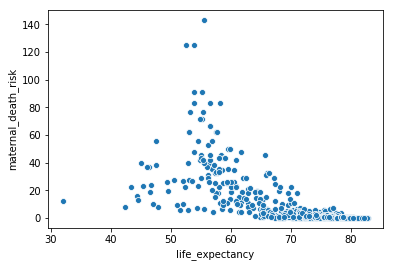

In [165]:
sns.scatterplot("life_expectancy", "maternal_death_risk", data=matvgov_2010)

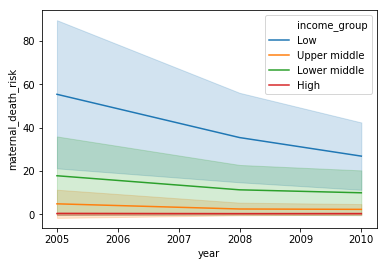

In [168]:
sns.lineplot("year", "maternal_death_risk", hue='income_group', data=matvgov, ci='sd')

## Group 2 - What factors may contribute to child mortality?

In [68]:
malnutrit = world_data.dropna(subset=['malnutrition_children'], how='all')


In [103]:
malnutrit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 46 to 11284
Data columns (total 20 columns):
country                      737 non-null object
year                         737 non-null int64
population                   737 non-null int64
region                       737 non-null object
sub_region                   737 non-null object
income_group                 737 non-null object
life_expectancy              737 non-null float64
income                       737 non-null int64
children_per_woman           737 non-null float64
child_mortality              737 non-null float64
pop_density                  737 non-null float64
co2_per_capita               694 non-null float64
years_in_school_men          718 non-null float64
years_in_school_women        718 non-null float64
sugar_intake_daily           619 non-null float64
gov_health_spending_ratio    425 non-null float64
maternal_death_risk          88 non-null float64
cellphones_per100            631 non-null float64
mal

In [104]:
pearsonr(malnutrit.malnutrition_children, malnutrit.child_mortality)

(0.6155122275987994, 4.751148886401786e-78)

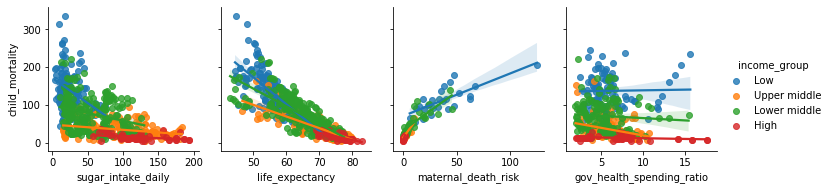

In [148]:
sns.pairplot(malnutrit, hue='income_group', x_vars=['sugar_intake_daily', 'life_expectancy', 'maternal_death_risk', 'gov_health_spending_ratio'], y_vars='child_mortality', kind='reg')

## Group 3 - Factors related to Life Expectancy

In [164]:
lifeexp = world_data.dropna(subset=['life_expectancy'], how='all')
lifeexp = lifeexp[lifeexp.year == 2000]

In [165]:
df = lifeexp.dropna(subset=['life_expectancy', 'gov_health_spending_ratio'], how='any')

In [166]:
pearsonr(df.life_expectancy, df.gov_health_spending_ratio)

(0.31759804894694044, 3.413955177593017e-05)

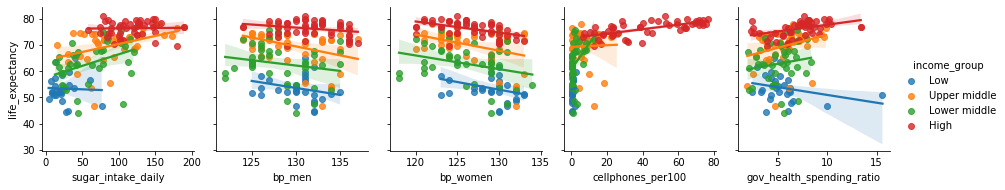

In [167]:
sns.pairplot(lifeexp, hue='income_group', x_vars=['sugar_intake_daily', 'bp_men', 'bp_women', 'cellphones_per100', 'gov_health_spending_ratio'], y_vars='life_expectancy', kind='reg')

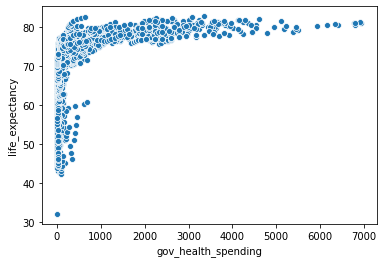

In [133]:
sns.scatterplot('gov_health_spending', 'life_expectancy', data=lifeexp)

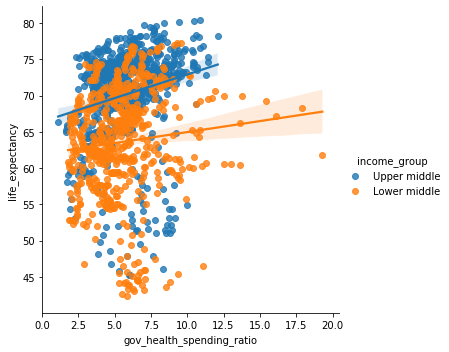

In [147]:
sns.lmplot('gov_health_spending_ratio', 'life_expectancy', hue='income_group', data=lifeexp[lifeexp.income_group.isin(['Lower middle', 'Upper middle'])])

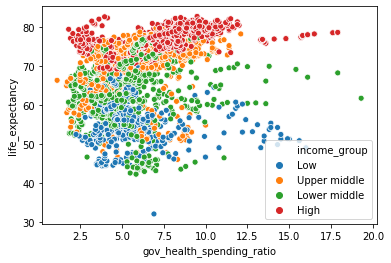

In [122]:
sns.scatterplot('gov_health_spending_ratio', 'life_expectancy', hue='income_group', data=df)

In [19]:
import statsmodels.formula.api as smf

In [123]:
results = smf.ols('life_expectancy ~ C(income_group)', data=matvgov).fit()

In [124]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     218.5
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           6.11e-86
Time:                        16:44:04   Log-Likelihood:                -1381.5
No. Observations:                 432   AIC:                             2771.
Df Residuals:                     428   BIC:                             2787.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          78.3000      0.507    154.554      0.000      77.304      79.296
C(income_group)[T.Low]            -20.9338      0.882    -23.740      0.000     -22.667     -19.201
C(income_group)[T.Lower middle]   -13.2769      0.773    -17.180      0.000     -14.796     -11.758
C(income_group)[T.Upper middle]    -6.7705      0.740     -9.154      0.000      -8.224      -5.317
==============================================================================
Omnibus:                      122.976   Durbin-Watson:                   0.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              329.703
Skew:                          -1.374   Prob(JB):                     2.55e-72
Kurtosis:                       6.280   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
from scipy.stats import f_oneway

In [127]:
results = f_oneway(df[df.income_group == 'Low']['life_expectancy'],
         df[df.income_group == 'Lower middle']['life_expectancy'],
         df[df.income_group == 'Upper middle']['life_expectancy'],
         df[df.income_group == 'High']['life_expectancy']
        )

In [128]:
results

F_onewayResult(statistic=1517.1039912609929, pvalue=0.0)

In [129]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [130]:
mc = MultiComparison(matvgov['life_expectancy'], matvgov['income_group'])

In [131]:
mc_results = mc.tukeyhsd()
print(mc_results)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj  lower    upper   reject
-----------------------------------------------------------------
        High          Low -20.9338 0.001 -23.2081 -18.6595   True
        High Lower middle -13.2769 0.001 -15.2702 -11.2837   True
        High Upper middle  -6.7705 0.001  -8.6781  -4.8629   True
         Low Lower middle   7.6569 0.001    5.263  10.0508   True
         Low Upper middle  14.1633 0.001  11.8403  16.4864   True
Lower middle Upper middle   6.5064 0.001   4.4578   8.5551   True
-----------------------------------------------------------------


## Group 4 - Is education related to other indicators of a nation's health/economics?

In [8]:
edu = world_data.dropna(subset=['education_gender_ratio'], how='any')

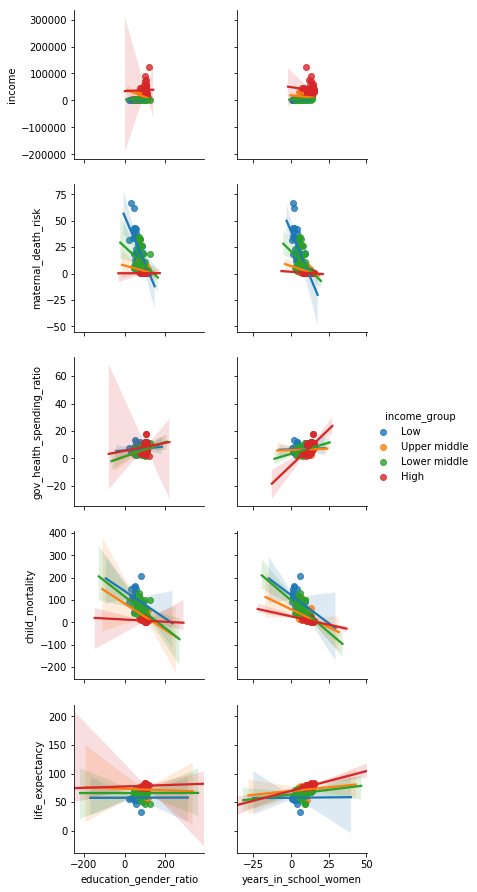

In [84]:
sns.pairplot(edu_now, x_vars=['education_gender_ratio', 'years_in_school_women'], y_vars=['income', 'maternal_death_risk', 'gov_health_spending_ratio', 'child_mortality', 'life_expectancy'],
             hue='income_group', kind='reg')

In [55]:
edu_ear = edu[edu.year==1990]
edu_now = edu[edu.year==2010]


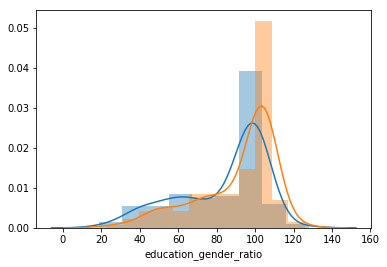

In [57]:
sns.distplot(edu_ear.education_gender_ratio)
sns.distplot(edu_now.education_gender_ratio)


In [70]:

edu_now['edu_ratio'] = np.where(edu_now['education_gender_ratio'] > 100, 'high', 'low')

/home/lina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


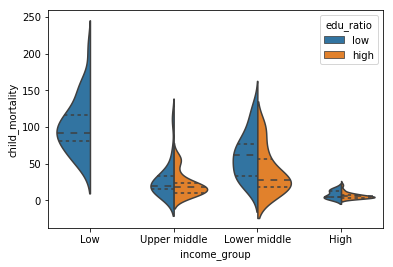

In [79]:
sns.violinplot('income_group', 'child_mortality', hue='edu_ratio', data=edu_now, split=True, inner='quartile')

In [76]:

edu_ear['edu_ratio'] = np.where(edu_ear['education_gender_ratio'] > 100, 'high', 'low')

/home/lina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


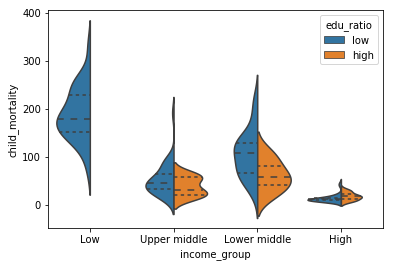

In [78]:
sns.violinplot('income_group', 'child_mortality', hue='edu_ratio', data=edu_ear, split=True, inner='quartile')

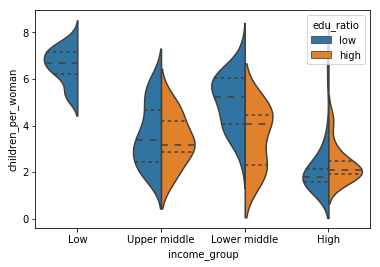

In [83]:
sns.violinplot('income_group', 'children_per_woman', hue='edu_ratio', data=edu_ear, split=True, inner='quartile')